In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2025-04-04 06:03:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   234MB/s    in 0.4s    

2025-04-04 06:03:02 (234 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



# **UNZIP**

In [ ]:
# !unzip pizza_steak.zip

In [ ]:
zip_ref=zipfile.ZipFile('/content/pizza_steak.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
# with zipfile.ZipFile('pizza_steak.zip', 'r') as zip_ref:
#     zip_ref.extractall()

In [ ]:
!ls /content/pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('/content/pizza_steak'):
    print(f'THere are {len(dirnames)} directories and {len(filenames)} images in "{dirpath}".')

THere are 2 directories and 0 images in "/content/pizza_steak".
THere are 2 directories and 0 images in "/content/pizza_steak/train".
THere are 0 directories and 750 images in "/content/pizza_steak/train/pizza".
THere are 0 directories and 750 images in "/content/pizza_steak/train/steak".
THere are 2 directories and 0 images in "/content/pizza_steak/test".
THere are 0 directories and 250 images in "/content/pizza_steak/test/pizza".
THere are 0 directories and 250 images in "/content/pizza_steak/test/steak".


In [ ]:
num_steak_images_train=len(os.listdir('/content/pizza_steak/train/steak'))
num_steak_images_train

750

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pathlib

def view_random_image(target_dir, target_class):
    target_folder=pathlib.Path(target_dir)/target_class
    random_image=random.sample(os.listdir(target_folder), 1)
    path=target_folder/random_image[0]
    img=mpimg.imread(path)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f'Image_shape: {img.shape}')

Image_shape: (512, 512, 3)


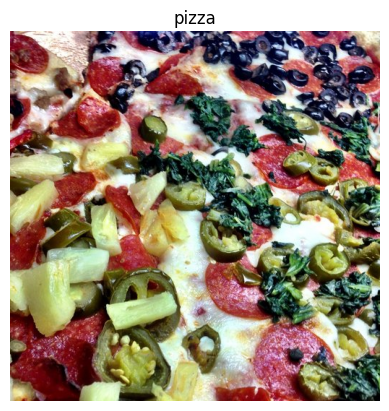

In [ ]:
view_random_image(target_dir='/content/pizza_steak/train/', target_class='pizza')

In [ ]:
import tensorflow as tf
IMG_SIZE=(224,224)

train_dir='/content/pizza_steak/train/'
test_dir='/content/pizza_steak/test/'

train_data=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                               batch_size=32,
                                                               seed=42,
                                                               image_size=IMG_SIZE)

test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               batch_size=32,
                                                               seed=42,
                                                               image_size=IMG_SIZE)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


# Model Building (Scratch)

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[224,224,3]),
    tf.keras.layers.Rescaling(1/255.),
    tf.keras.layers.Conv2D(filters=64, kernel_size=7, padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1, activation='sigmoid')

])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(momentum=0.9, learning_rate=0.001),
              metrics=['accuracy'])
model.fit(train_data, validation_data=test_data, epochs=5)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.5235 - loss: 0.9406 - val_accuracy: 0.6660 - val_loss: 0.6322
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 249ms/step - accuracy: 0.6396 - loss: 0.6268 - val_accuracy: 0.7600 - val_loss: 0.5050
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 224ms/step - accuracy: 0.7007 - loss: 0.5822 - val_accuracy: 0.7800 - val_loss: 0.5054
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 221ms/step - accuracy: 0.7491 - loss: 0.5342 - val_accuracy: 0.8160 - val_loss: 0.4591
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 229ms/step - accuracy: 0.7524 - loss: 0.5172 - val_accuracy: 0.8080 - val_loss: 0.4765


# Data Augmentation

In [ ]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2)
])

In [ ]:
class_names=train_data.class_names

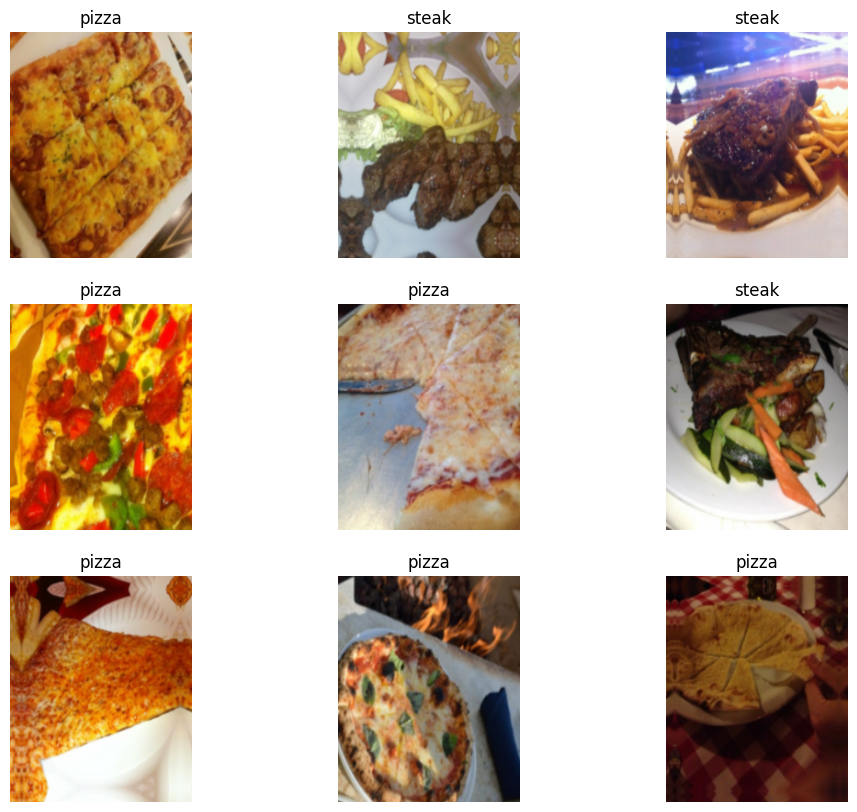

In [ ]:
plt.figure(figsize=(12, 10))
for images, labels in train_data.take(1):
    images_augmented=data_augmentation(images)
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images_augmented[i]/255)
        plt.title(class_names[labels[i].numpy().astype('int8')])
        plt.axis('off')

In [ ]:
model.compile(loss="binary_crossentropy", metrics=['accuracy'],
              optimizer=tf.keras.optimizers.SGD(momentum=0.9, learning_rate=0.01))

In [ ]:
model.fit(train_data, epochs=5, validation_data=test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 331ms/step - accuracy: 0.5163 - loss: 1.1383 - val_accuracy: 0.5000 - val_loss: 0.6979
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 240ms/step - accuracy: 0.5271 - loss: 0.6928 - val_accuracy: 0.5020 - val_loss: 0.6857
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 216ms/step - accuracy: 0.5957 - loss: 0.6696 - val_accuracy: 0.7420 - val_loss: 0.5678
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 208ms/step - accuracy: 0.6587 - loss: 0.6305 - val_accuracy: 0.7840 - val_loss: 0.5916
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 215ms/step - accuracy: 0.7193 - loss: 0.5740 - val_accuracy: 0.7680 - val_loss: 0.4956


In [ ]:
model.compile(loss="binary_crossentropy", metrics=['accuracy'],
              optimizer=tf.keras.optimizers.SGD(momentum=0.9, learning_rate=0.003))

In [ ]:
model.fit(train_data, epochs=5, validation_data=test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 220ms/step - accuracy: 0.7064 - loss: 0.5683 - val_accuracy: 0.7920 - val_loss: 0.4788
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 207ms/step - accuracy: 0.7698 - loss: 0.5257 - val_accuracy: 0.8060 - val_loss: 0.4597
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 210ms/step - accuracy: 0.7552 - loss: 0.5125 - val_accuracy: 0.8020 - val_loss: 0.4354
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 218ms/step - accuracy: 0.7726 - loss: 0.5093 - val_accuracy: 0.8320 - val_loss: 0.4289
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 209ms/step - accuracy: 0.7510 - loss: 0.5195 - val_accuracy: 0.8180 - val_loss: 0.3964


# Transfer Learning

In [ ]:
base_model=tf.keras.applications.ResNet50(include_top=False, weights='imagenet')

avg=tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output=tf.keras.layers.Dense(units=1, activation='sigmoid')(avg)
model=tf.keras.Model(inputs=base_model.input, outputs=output)

In [ ]:
for layer in base_model.layers:
    layer.trainable=False

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
              metrics=['accuracy'])

model.fit(train_data, epochs=5, validation_data=test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 373ms/step - accuracy: 0.6483 - loss: 0.6411 - val_accuracy: 0.9620 - val_loss: 0.1095
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 127ms/step - accuracy: 0.9323 - loss: 0.1708 - val_accuracy: 0.9740 - val_loss: 0.0902
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.9535 - loss: 0.1344 - val_accuracy: 0.9780 - val_loss: 0.0792
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9639 - loss: 0.1174 - val_accuracy: 0.9800 - val_loss: 0.0734
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - accuracy: 0.9746 - loss: 0.0970 - val_accuracy: 0.9840 - val_loss: 0.0685


In [ ]:
initial_learning_rate=0.01
lr_schedule=tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=42,
    decay_rate=0.96,
    staircase=False
)

early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9),
              metrics=['accuracy'])

model.fit(train_data, epochs=100, validation_data=test_data, callbacks=early_stopping)

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 288ms/step - accuracy: 0.9656 - loss: 0.1040 - val_accuracy: 0.9720 - val_loss: 0.0804
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.9686 - loss: 0.0877 - val_accuracy: 0.9440 - val_loss: 0.1460
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9463 - loss: 0.1129 - val_accuracy: 0.9860 - val_loss: 0.0527
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.9858 - loss: 0.0415 - val_accuracy: 0.9760 - val_loss: 0.0662
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.9785 - loss: 0.0494 - val_accuracy: 0.9840 - val_loss: 0.0487
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.9893 - loss: 0.0317 - val_accuracy: 0.9880 - val_loss: 0.0530
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.9980 - loss: 0.0218 - val_accuracy: 0.9840 - val_loss: 0.0504
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.9974 - loss: 0.0221 - val_acc

In [ ]:
inputs=tf.keras.Input(shape=(224, 224, 3))

x=data_augmentation(inputs)

x=tf.keras.applications.resnet50.preprocess_input(x)

base_model=tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_tensor=x)

x=tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

outputs=tf.keras.layers.Dense(units=1, activation='sigmoid')(x)

model=tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
for layer in base_model.layers:
    layer.trainable=False

In [ ]:
initial_learning_rate=0.01
lr_schedule=tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=42,
    decay_rate=0.96,
    staircase=False
)

early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9),
              metrics=['accuracy'])

model.fit(train_data, epochs=100, validation_data=test_data, callbacks=early_stopping)

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 50s 874ms/step - accuracy: 0.8330 - loss: 0.3339 - val_accuracy: 0.9920 - val_loss: 0.0412
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 67s 584ms/step - accuracy: 0.9689 - loss: 0.0947 - val_accuracy: 0.9900 - val_loss: 0.0419
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 27s 575ms/step - accuracy: 0.9686 - loss: 0.0741 - val_accuracy: 0.9900 - val_loss: 0.0379
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 525ms/step - accuracy: 0.9719 - loss: 0.0744 - val_accuracy: 0.9900 - val_loss: 0.0397
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 42s 542ms/step - accuracy: 0.9751 - loss: 0.0657 - val_accuracy: 0.9920 - val_loss: 0.0382
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 513ms/step - accuracy: 0.9784 - loss: 0.0510 - val_accuracy: 0.9920 - val_loss: 0.0347
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 429ms/step - accuracy: 0.9814 - loss: 0.0475 - val_accuracy: 0.9920 - val_loss: 0.0370
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 384ms/step - accuracy: 0.9792 - loss: 0.0664 - 